# Phase 2 Project:

**Author**: Jordana Tepper

**Pace**: Live NYC

**Instructor**: Joseph Mata

## Overview

## Business Problem

## Data Understanding

### Imports

In [1]:
# Importing neccesary packages

# Basic imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

#Modeling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Loading in data

In [2]:
# Loading in data from kc_house_data file which includes information about King County House Sales

kc_house_df = pd.read_csv('data/kc_house_data.csv')
kc_house_df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

### Using .info()

In [3]:
# Looking at the general structure and content of kc_house_df

kc_house_df.info()

# 21 columns and 21597 rows with missing values in 'waterfront', 'view', and 'yr_renovated'

# Datatypes in this DataFrame are int, object, and float

# For the columns with missing values, I will look at what percentage of the column this missing-ness accounts for
# After doing so, I will decide how to deal with the missing data

# 'date' is listed as type object which is likely due to the way that the dates are formatted, 
# but I will further analyze this column to confirm

# It is also interesting that 'sqft_basement' is type object, so I will further explore this column.

# 'zipcode' is of type int, but I know that a zipcode represents a given area and is actually a categorical variable. 
# Therefore, after I train test split, I will use OneHotEncoder create dummy variables for this column.
# Doing so will allow me to use 'zipcode' in my model despite it being a categorical variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Looking at missing values

In [4]:
# Looking at what percent of the data in 'waterfront' is missing
kc_house_df['waterfront'].isnull().sum()/len(kc_house_df['waterfront'])

# Dropping 11% of the data is a lot, so I will use the 'view' column in our Data Preparation to minimize the number
# of entries that I drop.

# The column 'view' refers to the quality of the view from the house.
# More specifically, if the house has a view of a body of water, 
# the 'view' column will have a value that indicates a quality other than 'NONE' ('NONE' signfies no view)

# Therefore, if a an entry has a value of 'NONE' in 'view',
# I can assume that the value for 'waterfront' should be 'NO'

0.11001527989998611

In [5]:
# Looking at what percent of the data in 'view' is missing
kc_house_df['view'].isnull().sum()/len(kc_house_df['view'])

# Dropping 0.3% of the data will not make an impact on the rest of the data, so I will go ahead and drop the missing
# values from the 'view' column during my Data Preparation

0.0029170718155299346

In [6]:
# Looking at what percent of the data in 'yr_renovated' is missing
kc_house_df['yr_renovated'].isnull().sum()/len(kc_house_df['yr_renovated'])

# Dropping 17.8% of the data is a lot, but there is no other column that can provide me with this missing information,
# and I don't want to assume that missing data means that a house was not renovated.

# (Using 'yr_built' to fill in the missing data in 'yr_renovated' would be based upon the assumption that a missing
# entry means that the house was no renovated)

# Therefore, in conclusion, I'd rather have less (but still a good amount) data that is of higher accuracy 
# than slightly more data that is potentially wrong, so I will drop the missing values from 'yr_renovated' during
# my Data Preparation

0.17789507802009538

### Exploring the DataTypes of certain columns

In [7]:
# Exploring the 'date' column Datatype
print(kc_house_df['date'])
print('\n')
print("A single entry in column 'date' is of'", type(kc_house_df['date'][0]))

# This shows me that the entries in the 'date' column are strings, so during my Data Preparation, 
# I will clean up this column by splitting it into a month column and a year column

# After this, I will also confirm that this data about houses sold in year 2014 - 2015

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object


A single entry in column 'date' is of' <class 'str'>


In [8]:
# 'sqft_basement' is listed as an object, so I will look at the different values in the 'sqft_basement' column
print('Value Counts')
print(kc_house_df['sqft_basement'].value_counts())
print('\n')

print('Value Counts in Percentages')
print(kc_house_df['sqft_basement'].value_counts(normalize = True))

# I see that there are 454 entries in this column with the value '?' 
# This indicates that there is a placeholder in the 'sqft_basement' column to signify missing values

# Futhermore, when looking at the value counts as percentages, I can see that the '?' placeholders take up only 2.1%
# of the data, so during my data cleaning, it seems safe to drop these rows.

# After I drop these rows, I will convert the rest of the data from this column to floats

Value Counts
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
946.0         1
207.0         1
768.0         1
3480.0        1
243.0         1
Name: sqft_basement, Length: 304, dtype: int64


Value Counts in Percentages
0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
946.0     0.000046
207.0     0.000046
768.0     0.000046
3480.0    0.000046
243.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64


### Using .describe() on the numerical columns

In [9]:
# Deactivating scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Looking at the descriptive statistics for the numerical columns 
# (not including 'sqft_basement' because I haven't dropped the '?' placeholders or changed the other values to flaots)

kc_house_df.describe()

# I see that many columns have outliers:
#  - 'price' has outliers for both the min ($78,000) and max ($7,700,000)

#  - 'bedrooms' has a max outlier (33) which I will probably remove during my Data Preparation

#  - 'bathrooms' has a max outlier (8)

#  - 'sqft_living' has outliers for both the min (370) and max (13,540)

#  - 'sqft_lot' has outliers for both the min (520) and max (1,651,359)

#  - 'sqft_above' has outliers for both the min (370) and max (9,410)

#  - Something interesting about 'yr_renovated' is that the max is 2015 
#    but the min and 25%, 50%, and 75% quartiles are 0.
#    This likely indicates that a value of 0 means that the house has not been renovated, 
#    but I will do further analysis of this.

#  - 'sqft_living15' - which is the square footage of interior housing living space for the nearest 15 neighbors -
#    has outliers for both the min (399) and max (6,210)

#  - 'sqft_lot15' - which is the square footage of the land lots of the nearest 15 neighbors -
#    has outliers for both the min (651) and max (871,200)

# After I clean the 'sqft_basement' column in my Data Preparation, I will repeat the .describe() step

# Furthemore, this information shows me that I will eventually need to use StandardScaler 
# because the values in different columns are not of the same magnitude

id         price    bedrooms   bathrooms  sqft_living  \
count      21597.00000   21597.00000 21597.00000 21597.00000  21597.00000   
mean  4580474287.77099  540296.57351     3.37320     2.11583   2080.32185   
std   2876735715.74778  367368.14010     0.92630     0.76898    918.10613   
min      1000102.00000   78000.00000     1.00000     0.50000    370.00000   
25%   2123049175.00000  322000.00000     3.00000     1.75000   1430.00000   
50%   3904930410.00000  450000.00000     3.00000     2.25000   1910.00000   
75%   7308900490.00000  645000.00000     4.00000     2.50000   2550.00000   
max   9900000190.00000 7700000.00000    33.00000     8.00000  13540.00000   

           sqft_lot      floors  sqft_above    yr_built  yr_renovated  \
count   21597.00000 21597.00000 21597.00000 21597.00000   17755.00000   
mean    15099.40876     1.49410  1788.59684  1970.99968      83.63678   
std     41412.63688     0.53968   827.75976    29.37523     399.94641   
min       520.00000     1.00000   370.00000  1900.00000       0.00000   
25%      5040.00000     1.00000  1190.00000  1951.00000       0.00000   
50%      7618.00000     1.50000  1560.00000  1975.00000       0.00000   
75%     10685.00000     2.00000  2210.00000  1997.00000       0.00000   
max   1651359.00000     3.50000  9410.00000  2015.00000    2015.00000   

          zipcode         lat        long  sqft_living15   sqft_lot15  
count 21597.00000 21597.00000 21597.00000    21597.00000  21597.00000  
mean  98077.95185    47.56009  -122.21398     1986.62032  12758.28351  
std      53.51307     0.13855     0.14072      685.23047  27274.44195  
min   98001.00000    47.15590  -122.51900      399.00000    651.00000  
25%   98033.00000    47.47110  -122.32800     1490.00000   5100.00000  
50%   98065.00000    47.57180  -122.23100     1840.00000   7620.00000  
75%   98118.00000    47.67800  -122.12500     2360.00000  10083.00000  
max   98199.00000    47.77760  -121.31500     6210.00000 871200.00000

### Clarification work after .describe() on the numerical columns

In [10]:
# Examing the 'yr_renovated' column to see if a value of 0 represents no renovation

kc_house_df[['yr_built','yr_renovated']].sort_values(by = 'yr_built').head(30)

# It seems as though a value of 0 signfies no renovations because I can see that there are both NaN values and 0 values
# This means that a value of NaN represents missing data and a value of 0 must mean the absence of renovations

# Note: I included 'yr_built' in this evalutation because I thought that maybe a value of zero 
#       was specifically for newer houses that did not need renovations,
#       but as seen from the data, older homes also have values of 0.

yr_built  yr_renovated
14069      1900       0.00000
14783      1900       0.00000
10973      1900       0.00000
115        1900           nan
4693       1900           nan
15283      1900       0.00000
8849       1900    1996.00000
18061      1900       0.00000
5231       1900       0.00000
12357      1900       0.00000
16070      1900       0.00000
18901      1900           nan
18882      1900       0.00000
4201       1900    1955.00000
939        1900       0.00000
10253      1900       0.00000
1927       1900    2003.00000
12751      1900           nan
4434       1900           nan
17168      1900       0.00000
18765      1900       0.00000
11522      1900       0.00000
12146      1900    1980.00000
8996       1900       0.00000
537        1900       0.00000
12122      1900       0.00000
13670      1900           nan
16720      1900       0.00000
19048      1900           nan
15036      1900       0.00000

### Using .describe() on the categorical columns

In [11]:
# Looking at the descriptive statistics for the categorical columns
# This will include sqft_basement because it is still formatted as an object

kc_house_df.describe(include=[object])

# For each categorical variables, the value with the highest frequency is as follows:
#  - 'date': '6/23/2014'
#  - 'waterfront': 'NO'
#  - 'view': 'NONE'
#  - 'condition': 'Average'
#  - 'grade': '7 Average'
#  - 'sqft_basement': '0.0'

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

### Clarification work after .describe() on the categorical columns

In [12]:
# According to the table above, grade has 11 distinct values, so I will take a look at those
print(kc_house_df['grade'].value_counts())

# Looking further at the 'Luxury' and 'Mansion' values
kc_house_df.groupby('grade')['price'].mean().sort_values(ascending = False)

# Based on this data, I am going to drop '13 Mansion' and '12 Luxury' during my Data Preparation.

# I am choosing to do this because while '13 Mansion' and '12 Luxury' are present in only 102 of the entries, 
# I think that, based on the mean prices for these two categories, they will skew the dataset.

# Furthermore, I do not think the average home buyer will be looking at mansions and luxury homes, and therefore,
# these categories are not relevant to my model.

# Also, there is only one house with the grade '3 poor', 
# so I will add it to the '4 low' category in my Data Preparation

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


grade
13 Mansion      3710769.23077
12 Luxury       2202528.08989
11 Excellent    1497792.37845
10 Very Good    1072347.46737
9 Better         773738.22218
8 Good           542986.80000
7 Average        402594.57277
6 Low Average    301916.57066
3 Poor           262000.00000
5 Fair           248523.97107
4 Low            212001.85185
Name: price, dtype: float64

### Correlation table of numerical values

In [13]:
# Looking at the correlations between the variables (target ('price') and numerical independent variables) 
# which will be useful when I begin my modeling section

kc_house_df.corr()

# 'price' seems to have the highest correaltion with 'sqft_living' out of all the numerical variables

# 'sqft_living' and 'sqft_above' are highly correlated with one another (0.88)

# 'sqft_living' and 'bathrooms' seem to be relatively highly correlated with one another (0.76)


# 'sqft_living' and 'sqft_living15' seem to be relatively highly correlated with one another (0.76)
# Similarly, 'sqft_lot' and 'sqft_lot15' seem to be relatively highly correlated with one another (0.72)

# These are all important correlations that may suggest colinearity 
# and should thus be taken into account during my modeling

# After I do the neccesary data cleaning, I will redo this correlation table as well as a heatmap during my modeling

id    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.00000 -0.01677   0.00115    0.00516     -0.01224  -0.13191   
price         -0.01677  1.00000   0.30879    0.52591      0.70192   0.08988   
bedrooms       0.00115  0.30879   1.00000    0.51451      0.57821   0.03247   
bathrooms      0.00516  0.52591   0.51451    1.00000      0.75576   0.08837   
sqft_living   -0.01224  0.70192   0.57821    0.75576      1.00000   0.17345   
sqft_lot      -0.13191  0.08988   0.03247    0.08837      0.17345   1.00000   
floors         0.01861  0.25680   0.17794    0.50258      0.35395  -0.00481   
sqft_above    -0.01080  0.60537   0.47939    0.68667      0.87645   0.18414   
yr_built       0.02162  0.05395   0.15567    0.50717      0.31815   0.05295   
yr_renovated  -0.01201  0.12960   0.01849    0.05105      0.05566   0.00451   
zipcode       -0.00821 -0.05340  -0.15409   -0.20479     -0.19980  -0.12959   
lat           -0.00180  0.30669  -0.00995    0.02428      0.05216  -0.08551   
long           0.02067  0.02204   0.13205    0.22490      0.24121   0.23023   
sqft_living15 -0.00270  0.58524   0.39341    0.56988      0.75640   0.14476   
sqft_lot15    -0.13856  0.08284   0.03069    0.08830      0.18434   0.71820   

                floors  sqft_above  yr_built  yr_renovated  zipcode      lat  \
id             0.01861    -0.01080   0.02162      -0.01201 -0.00821 -0.00180   
price          0.25680     0.60537   0.05395       0.12960 -0.05340  0.30669   
bedrooms       0.17794     0.47939   0.15567       0.01849 -0.15409 -0.00995   
bathrooms      0.50258     0.68667   0.50717       0.05105 -0.20479  0.02428   
sqft_living    0.35395     0.87645   0.31815       0.05566 -0.19980  0.05216   
sqft_lot      -0.00481     0.18414   0.05295       0.00451 -0.12959 -0.08551   
floors         1.00000     0.52399   0.48919       0.00354 -0.05954  0.04924   
sqft_above     0.52399     1.00000   0.42404       0.02214 -0.26157 -0.00120   
yr_built       0.48919     0.42404   1.00000      -0.22521 -0.34721 -0.14837   
yr_renovated   0.00354     0.02214  -0.22521       1.00000  0.06985  0.03215   
zipcode       -0.05954    -0.26157  -0.34721       0.06985  1.00000  0.26674   
lat            0.04924    -0.00120  -0.14837       0.03215  0.26674  1.00000   
long           0.12594     0.34484   0.40999      -0.07216 -0.56426 -0.13537   
sqft_living15  0.28010     0.73177   0.32638      -0.00025 -0.27930  0.04868   
sqft_lot15    -0.01072     0.19508   0.07078       0.00385 -0.14729 -0.08614   

                  long  sqft_living15  sqft_lot15  
id             0.02067       -0.00270    -0.13856  
price          0.02204        0.58524     0.08284  
bedrooms       0.13205        0.39341     0.03069  
bathrooms      0.22490        0.56988     0.08830  
sqft_living    0.24121        0.75640     0.18434  
sqft_lot       0.23023        0.14476     0.71820  
floors         0.12594        0.28010    -0.01072  
sqft_above     0.34484        0.73177     0.19508  
yr_built       0.40999        0.32638     0.07078  
yr_renovated  -0.07216       -0.00025     0.00385  
zipcode       -0.56426       -0.27930    -0.14729  
lat           -0.13537        0.04868    -0.08614  
long           1.00000        0.33563     0.25559  
sqft_living15  0.33563        1.00000     0.18352  
sqft_lot15     0.25559        0.18352     1.00000

## Data Preparation

### Dropping the missing values in 'view'

In [14]:
# Dropping the missing values from 'view'
kc_house_df.dropna(subset = ['view'], axis = 0, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

### Filling in the missing values from 'waterfront' using the data from 'view'

In [15]:
# When 'view' has a value of 'NONE', assign the corresponding value of 'waterfront' to 'NO' 
# (including those that already have a value of 'NO')

kc_house_df.loc[kc_house_df['view'] == 'NONE', 'waterfront'] = 'NO'

In [16]:
# Checking how many missing values there are in 'waterfront' after this imputation
kc_house_df['waterfront'].isna().sum()/len(kc_house_df['waterfront'])

# I will drop the rest of the missing values in 'waterfront' because they only account for 1.2% of the data

0.012073929599702795

In [17]:
# Dropping the remaining missing values in 'waterfront'
kc_house_df.dropna(subset = ['waterfront'], axis = 0, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21274 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21274 non-null  int64  
 1   date           21274 non-null  object 
 2   price          21274 non-null  float64
 3   bedrooms       21274 non-null  int64  
 4   bathrooms      21274 non-null  float64
 5   sqft_living    21274 non-null  int64  
 6   sqft_lot       21274 non-null  int64  
 7   floors         21274 non-null  float64
 8   waterfront     21274 non-null  object 
 9   view           21274 non-null  object 
 10  condition      21274 non-null  object 
 11  grade          21274 non-null  object 
 12  sqft_above     21274 non-null  int64  
 13  sqft_basement  21274 non-null  object 
 14  yr_built       21274 non-null  int64  
 15  yr_renovated   17493 non-null  float64
 16  zipcode        21274 non-null  int64  
 17  lat            21274 non-null  float64
 18  long  

### Dropping missing values from 'yr_renovated'

In [18]:
# Dropping the missing values from 'yr_renovated'
kc_house_df.dropna(subset = ['yr_renovated'], axis = 0, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17493 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17493 non-null  int64  
 1   date           17493 non-null  object 
 2   price          17493 non-null  float64
 3   bedrooms       17493 non-null  int64  
 4   bathrooms      17493 non-null  float64
 5   sqft_living    17493 non-null  int64  
 6   sqft_lot       17493 non-null  int64  
 7   floors         17493 non-null  float64
 8   waterfront     17493 non-null  object 
 9   view           17493 non-null  object 
 10  condition      17493 non-null  object 
 11  grade          17493 non-null  object 
 12  sqft_above     17493 non-null  int64  
 13  sqft_basement  17493 non-null  object 
 14  yr_built       17493 non-null  int64  
 15  yr_renovated   17493 non-null  float64
 16  zipcode        17493 non-null  int64  
 17  lat            17493 non-null  float64
 18  long  

### Cleaning the 'date' column

In [19]:
# Making a new column 'month_sold' that includes only the month value from the corresponding 'date' entry

# Splitting the 'date' entries at the '/' to make each entry a list that consists of three values: month, day, year
kc_house_df['month_sold'] = kc_house_df['date'].str.split('/')

# Using .apply so that each entry in the new column 'month_sold' includes only the month in which the house was sold
kc_house_df['month_sold'] = kc_house_df['month_sold'].apply(lambda x : x[0])

In [20]:
# Making a new column 'year_sold' that includes only the year value from the corresponding 'date' entry
# This is a very similar process to making the 'month_sold' column

# Splitting the 'date' entries at the '/' to make each entry a list that consists of three values: month, day, year
kc_house_df['year_sold'] = kc_house_df['date'].str.split('/')

# Using .apply so that each entry in the new column 'year_sold' includes only the year in which the house was sold
kc_house_df['year_sold'] = kc_house_df['year_sold'].apply(lambda x : x[2])

In [21]:
# Confirming for my own understanding that the house sales in the dataset are from the years 2014-2015
print(kc_house_df['year_sold'].min())
print(kc_house_df['year_sold'].max())

2014
2015


In [22]:
# Because I seperated 'date' in month and year, I will drop the 'date' column
kc_house_df.drop(columns = ['date'], inplace = True)

### Cleaning the 'sqft_basement' column

In [23]:
# Reassigning the original DataFrame so that it only includes the entries where 'sqft_basement' does not have a '?'
kc_house_df = kc_house_df.loc[kc_house_df['sqft_basement'] != '?']

In [24]:
# Converting the remaining values in 'sqft_basement' to floats using .apply()
kc_house_df['sqft_basement'] = kc_house_df['sqft_basement'].apply(lambda x : float(x))

In [25]:
# During my Data Understanding, I mentioned that I would repeat the .describe() step 
# after I cleaned the 'sqft_basement' column and converted the remaining values to floats.

# I already examined the outliers from the rest of the numerical columns, so here I will focus on 'sqft_basement'.

kc_house_df.describe()

# sqft_basement has an outlier as its max (4820)

# The fact that the min of 'sqft_basement' is 0 tells me that this value signfies that there is no basement.

# Therefore, I will make a new column called 'basement' with values 1 and 0 
# where 1 means there is a basement and 0 means there is not basement.

id         price    bedrooms   bathrooms  sqft_living  \
count      17131.00000   17131.00000 17131.00000 17131.00000  17131.00000   
mean  4590416961.06252  536565.66067     3.37634     2.11650   2077.14261   
std   2875969100.33560  364046.53305     0.93122     0.76462    912.38306   
min      1000102.00000   80000.00000     1.00000     0.50000    370.00000   
25%   2126059294.50000  320000.00000     3.00000     1.75000   1430.00000   
50%   3905040040.00000  450000.00000     3.00000     2.25000   1910.00000   
75%   7334401020.00000  640000.00000     4.00000     2.50000   2540.00000   
max   9895000040.00000 7700000.00000    33.00000     8.00000  13540.00000   

           sqft_lot      floors  sqft_above  sqft_basement    yr_built  \
count   17131.00000 17131.00000 17131.00000    17131.00000 17131.00000   
mean    15172.34149     1.49533  1788.91997      288.22264  1971.19187   
std     41961.30101     0.53859   825.31818      440.37654    29.29859   
min       520.00000     1.00000   370.00000        0.00000  1900.00000   
25%      5037.00000     1.00000  1200.00000        0.00000  1952.00000   
50%      7607.00000     1.50000  1560.00000        0.00000  1975.00000   
75%     10624.00000     2.00000  2210.00000      550.00000  1997.00000   
max   1651359.00000     3.50000  9410.00000     4820.00000  2015.00000   

       yr_renovated     zipcode         lat        long  sqft_living15  \
count   17131.00000 17131.00000 17131.00000 17131.00000    17131.00000   
mean       81.33296 98077.51427    47.55960  -122.21286     1983.31849   
std       394.66046    53.40234     0.13868     0.14070      681.14260   
min         0.00000 98001.00000    47.15590  -122.51900      399.00000   
25%         0.00000 98033.00000    47.46920  -122.32700     1490.00000   
50%         0.00000 98065.00000    47.57140  -122.22800     1840.00000   
75%         0.00000 98117.00000    47.67790  -122.12400     2360.00000   
max      2015.00000 98199.00000    47.77760  -121.31500     6210.00000   

        sqft_lot15  
count  17131.00000  
mean   12773.73989  
std    27453.25674  
min      659.00000  
25%     5100.00000  
50%     7620.00000  
75%    10074.50000  
max   871200.00000

In [26]:
# Making the new column 'basement' where 0 means no basement and 1 means yes basement

# When 'sqft_basement' is greater than 0, the value of the new column 'basement' is 1
kc_house_df.loc[kc_house_df['sqft_basement'] > 0, 'basement'] = 1

# When 'sqft_basement' equals 0, the value of the new column 'basement' is 0
kc_house_df.loc[kc_house_df['sqft_basement'] == 0, 'basement'] = 0

# Making the 1's and 0's in the 'basement' column integers instead of floats
kc_house_df['basement'] = kc_house_df['basement'].apply(lambda x: int(x))

### Removing the extreme outlier from 'bedrooms'

In [27]:
# As seen from .describe(), there is an extreme outlier of 33 bedrooms in the 'bedrooms' column

# While this is likely an imputation error, I want to confirm this by looking at the number of bathrooms in the house
kc_house_df.loc[kc_house_df['bedrooms'] == 33]

# I see that there are 1.75 bathrooms in this house meaning that the value of 33 in 'bedrooms' cannot be accurate

id        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856  2402100895 640000.00000        33    1.75000         1620      6000   

       floors waterfront  view  condition  ... yr_built  yr_renovated  \
15856 1.00000         NO  NONE  Very Good  ...     1947       0.00000   

       zipcode      lat       long  sqft_living15  sqft_lot15  month_sold  \
15856    98103 47.68780 -122.33100           1330        4700           6   

       year_sold  basement  
15856       2014         1  

[1 rows x 23 columns]

In [28]:
# Dropping the row with 33 bedrooms because its value is incorrect
kc_house_df.drop(index = 15856, inplace = True)

### Removing '13 Mansion' and '12 Luxury' from 'grade'

In [29]:
kc_house_df = kc_house_df.loc[kc_house_df['grade'] != '12 Luxury']
kc_house_df = kc_house_df.loc[kc_house_df['grade'] != '13 Mansion']

### Joining '3 Poor' and '4 Low' from 'grade'

In [30]:
kc_house_df.loc[kc_house_df['grade'] == '3 Poor', 'grade'] = '4 Low'

In [31]:
# Confirming that the code above worked
kc_house_df['grade'].value_counts()

7 Average        7154
8 Good           4798
9 Better         2076
6 Low Average    1631
10 Very Good      884
11 Excellent      304
5 Fair            184
4 Low              19
Name: grade, dtype: int64

## Data Analysis

Before I begin my modeling, I want to visualize some of the trends in the data.

### Visualizing the relationship between Price and zipcode

In [32]:
# HELP
# price_x_zipcode = kc_house_df.groupby('zipcode')['price'].mean()
# price_x_zipcode = pd.DataFrame(price_x_zipcode)
# price_x_zipcode = price_x_zipcode.reset_index()
# price_x_zipcode = price_x_zipcode.rename(columns = {'price': 'Mean Price', 'zipcode': 'Zipcode'})

# fig = px.bar(price_x_zipcode, 'Zipcode', 'Mean Price')
# fig.update_xaxes(tickangle=90, nticks = 70)

### Visualizing the relationship between price and number of floors

In [33]:
# Making a new DataFrame that shows the mean selling price per number of floors
price_x_floors = kc_house_df.groupby('floors')['price'].mean()
price_x_floors = pd.DataFrame(price_x_floors)

# Renaming the columns for clarity
price_x_floors = price_x_floors.rename(columns = {'price': 'Mean Price', 'floors': 'Floors'})
price_x_floors = price_x_floors.rename_axis('Number of Floors')

# Graphing this relationship using a bar graph where x is the number of floors and y is the mean price
fig = px.bar(price_x_floors, price_x_floors.index, 'Mean Price', text = 'Mean Price', 
             title='Mean Selling Price Per Number of Floors', width=900, height = 650)

# Formating the text and color of the graph
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='darksalmon')
fig.update_layout(font=dict(size=13))
fig.show()

### Visualizing the relationship between price and month sold in 2014 - 2015

In [34]:
#HELP
# Making a new DataFrame that shows the mean selling price per month in 2014-2015
# price_x_month_2014 = kc_house_df.loc[kc_house_df['year_sold'] == '2014']
price_x_month = kc_house_df.groupby('month_sold')['price'].mean()
price_x_month = pd.DataFrame(price_x_month)
price_x_month = price_x_month.reset_index()

# Converting the values in month_sold to int so I can order them in the DataFrame
price_x_month['month_sold'] = price_x_month['month_sold'].apply(lambda x: int(x))

# Sorting the month_sold values in descending order
price_x_month = price_x_month.sort_values(by = 'month_sold', ascending = False)

# Renaming the columns for clarity
price_x_month = price_x_month.rename(columns = {'price': 'Mean Price', 'month_sold': 'Month Sold'})

# Setting the index to 'Month Sold'
price_x_month = price_x_month.set_index('Month Sold')

# Graphing this relationship using a bar graph where x is the month and y is the mean price
fig = px.line(price_x_month, price_x_month.index, 'Mean Price', text = 'Mean Price',
                 title='Mean Selling Price Per Month in 2014-2015', width=1000, height = 700)


# Formating the text and color of the graph as well as the y-axis values
fig.update_traces(marker_color='crimson', texttemplate='%{text:.3s}', textposition='bottom center')
fig.update_yaxes(range=[460000, 620000])
fig.update_xaxes(range=[0, 13], tickvals=[1,2,3,4,5,6,7,8,9,10,11,12])
fig.update_layout(font=dict(size=15))
fig.show()

### Visualizing the relationship between price and view quality (Excellent, Good, Average, Fair, None)

In [35]:
# Grouping each view level (Excellent, Good, Average, Fair, None) by mean price
price_x_view = kc_house_df.groupby('view')['price'].mean()

# Making a this series in a DataFrame and sorting by price
price_x_view = pd.DataFrame(price_x_view).sort_values(by = 'price')

# Renaming for clarity
price_x_view = price_x_view.rename(columns = {'price': 'Mean Price'})
price_x_view = price_x_view.rename_axis('View Rating')

# Graphing this relationship using a bar graph where x is the view rating and y is the mean price
fig = px.bar(price_x_view, price_x_view.index, 'Mean Price', text = 'Mean Price', 
             title='Mean Selling Price Per View Rating', width=1000, height = 700)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='mediumaquamarine')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['EXCELLENT', 'GOOD', 'AVERAGE', 'FAIR', 'NONE']},
                  font=dict(size=13),
                  showlegend = False
     )

In [36]:
# Making a box plot for the relationship between price and view quality 
# because I want to see if any of the differences in prices are influenced by outliers

# Not using mean price because I want to see a distributions of all the values
box_price_x_view = kc_house_df[['view', 'price', 'grade']]
box_price_x_view = box_price_x_view.loc[(box_price_x_view['grade'] != '12 Luxury') 
                                        & (kc_house_df['grade'] != '13 Mansion')]
box_price_x_view
fig = px.box(box_price_x_view, x = 'view', y = 'price')
fig.show()

# This boxplot shows that each view rating category has multiple outliers.
# This is important for me to know when creating my models and is something that I should potentially deal with.

### Visualizing the relationship between price and condition (Very Good, Good, Average, Fair/Poor)

In [37]:
# Looking at the value counts for 'condition'
condition = kc_house_df['condition']
condition.value_counts()

# Because there are signficantly less houses rated as 'Poor' and 'Fair', I will combine these two columns
price_x_condition = kc_house_df[['condition', 'price']]
price_x_condition.loc[(price_x_condition['condition'] == 'Fair')|(price_x_condition['condition'] == 'Poor'), \
                      'condition'] = 'Fair/Poor'

# Grouping each condition level (Very Good, Good, Average, Fair/Poor) by mean price
price_x_condition = price_x_condition.groupby('condition')['price'].mean()

# Making a this series in a DataFrame
price_x_condition = pd.DataFrame(price_x_condition)

# Renaming for clarity
price_x_condition = price_x_condition.rename(columns = {'price': 'Mean Price'})
price_x_condition = price_x_condition.rename_axis('Condition Rating')

# Graphing this relationship using a bar graph where x is the condition rating and y is the mean price
fig = px.bar(price_x_condition, price_x_condition.index, 'Mean Price', text = 'Mean Price', 
             title='Mean Price Per Condition Rating', width=1000, height = 650)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='cornflowerblue')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Fair/Poor', 'Good', 'Average', 'Very Good']},
                  font=dict(size=13),
                  showlegend = False
                  )

### Visualizing the relationship between longitude and latitude and price --> NEED TO FINISH

In [38]:
lat_long_price = kc_house_df[['lat','long','price', 'zipcode']]
#lat_long_price_mean_price = pd.DataFrame(lat_long_price.groupby(['lat', 'long'])['price'].mean())
#lat_long_price_mean_price
px.scatter(lat_long_price, 'long', 'lat', height = 700, color = 'price')


## Modeling

### Train Test Split

In [39]:
# Train test split with 70% of the data in the train data and 30% in the test data

# Target variable is price
y = kc_house_df['price']

# Predictor variables are every variable except price
X = kc_house_df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [40]:
# Checking the size of the train data and the test data, respectively
print(len(X_train))
print(len(X_test))

11935
5115


In [41]:
kc_house_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'basement'],
      dtype='object')

### Baseline Model

In [42]:
# Baseline model with only the continuous and discrete numerical values
base  = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 
         'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 
         'sqft_lot15', 'month_sold', 'year_sold']

lr = LinearRegression()

lr.fit(X_train[base], y_train)

LinearRegression()

In [43]:
# Checking the R-squared of my model
lr.score(X_train[base], y_train)

0.6169323141065657

In [44]:
# Checking my model for overfitting
lr.score(X_test[base], y_test)

# Confirmed not overfitting

0.6127690631908493

<AxesSubplot:ylabel='price'>

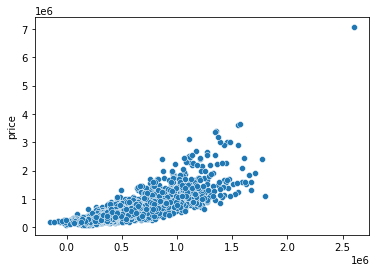

In [45]:
# Creating the y predictions
y_pred = lr.predict(X_test[base])

# Plotting the y predictions against the y test
sns.scatterplot(y_pred, y_test)

In [46]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 131085.2788820648
Root Mean Square Error = 214079.2054310178


###### Comments about baseline model

An R-squared of 61.69% is not great and the errors (MAE and RMSE) are too high.

For my next model, I will use One Hot Encoding and Ordinal Coding in order to allow myself to add categorical va
riables into my model.

I will also use StandardScaler to standardize and scale my X_train and X_test as well as np.log to normalize my y_train.

### Model 2

#### One Hot Encoding

In [47]:
# Using OneHotEncoder to make columns for each category in 'zipcode' and 'waterfront' for both the train and test data
# I specified drop = 'first' to drop the first column as a way to avoid the dummy variable trap.
# The dropped column will become the reference category
onehot_enc = OneHotEncoder(handle_unknown = 'error', drop = 'first', sparse = False)

# Nominal columns from the dataset
nom_col = ['zipcode', 'waterfront', 'month_sold', 'year_sold']

# One Hot Encoding
nom_cats_train = onehot_enc.fit_transform(X_train[nom_col])
nom_cats_test = onehot_enc.transform(X_test[nom_col])

# Assigning the column names of the dummy variables to columns
columns = onehot_enc.get_feature_names_out()

# Turning the One Hot Encoded data into dataframes (one for train, one for test)
nom_cats_train = pd.DataFrame(nom_cats_train, columns = columns)
nom_cats_test = pd.DataFrame(nom_cats_test, columns = columns)

# Concating X_train and nom_cats_train to make one large dataframe and reassigning it to X_train
X_train = pd.concat([X_train.reset_index(), nom_cats_train], axis = 1)

# Concating X_test and nom_cats_test to make one large dataframe and reassigning it to X_test
X_test = pd.concat([X_test.reset_index(), nom_cats_test], axis = 1)

In [48]:
# Because I One Hot Encoded 'zipcode' and 'waterfront', I can drop the original 'zipcode' and 'waterfront' columns
# I'll do this to both the train data and the test data

# Dropping 'zipcode' and 'waterfront' from the train data
X_train.drop(columns = ['zipcode', 'waterfront', 'month_sold', 'year_sold'], inplace = True)

# Dropping 'zipcode' and 'waterfront' from the test data
X_test.drop(columns = ['zipcode', 'waterfront', 'month_sold', 'year_sold'], inplace = True)

# I can also drop 'index' and 'id' because they are not relevent
X_train.drop(columns = ['index', 'id'], inplace = True)
X_test.drop(columns = ['index', 'id'], inplace = True)

#### Ordinal Encoding

In [49]:
# Using Ordinal Encoding to make the values of ordinal variables numerical

# Ordinal columns in the dataset
ord_cat_selector = ['view', 'condition', 'grade']

# Creating the train and test subsets that only include the relevant columns
ord_cat_subset_train = X_train[ord_cat_selector]
ord_cat_subset_test = X_test[ord_cat_selector]

# Correctly ordering the values of the ordinal columns
view_ord = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_ord = ['Poor', 'Fair', 'Average', 'Good','Very Good']
grade_ord = ['4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent']

# Defining ord_enc using OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [view_ord, condition_ord, grade_ord])

# Ordinal Encoding
ord_enc.fit_transform(ord_cat_subset_train)
ord_enc.transform(ord_cat_subset_test)

# Turning the Ordinal Encoded data into dataframes (one for train, one for test)
ord_cat_subset_train = pd.DataFrame(ord_enc.transform(ord_cat_subset_train),
                        columns = ord_cat_subset_train.columns)

ord_cat_subset_test = pd.DataFrame(ord_enc.transform(ord_cat_subset_test),
                        columns = ord_cat_subset_test.columns)

# Concating X_train and ord_cat_subset_train to make one large dataframe and reassigning it to X_train
X_train = pd.concat([X_train, ord_cat_subset_train], axis = 1)

# Concating X_test and ord_cat_subset_test to make one large dataframe and reassigning it to X_test
X_test = pd.concat([X_test, ord_cat_subset_test], axis = 1)

In [50]:
#Including only the columns that have numerical values 
#(this is essentially taking out the original 'view', 'condition', and 'grade' columns without dropping them)

X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

#### Standard Scaling X

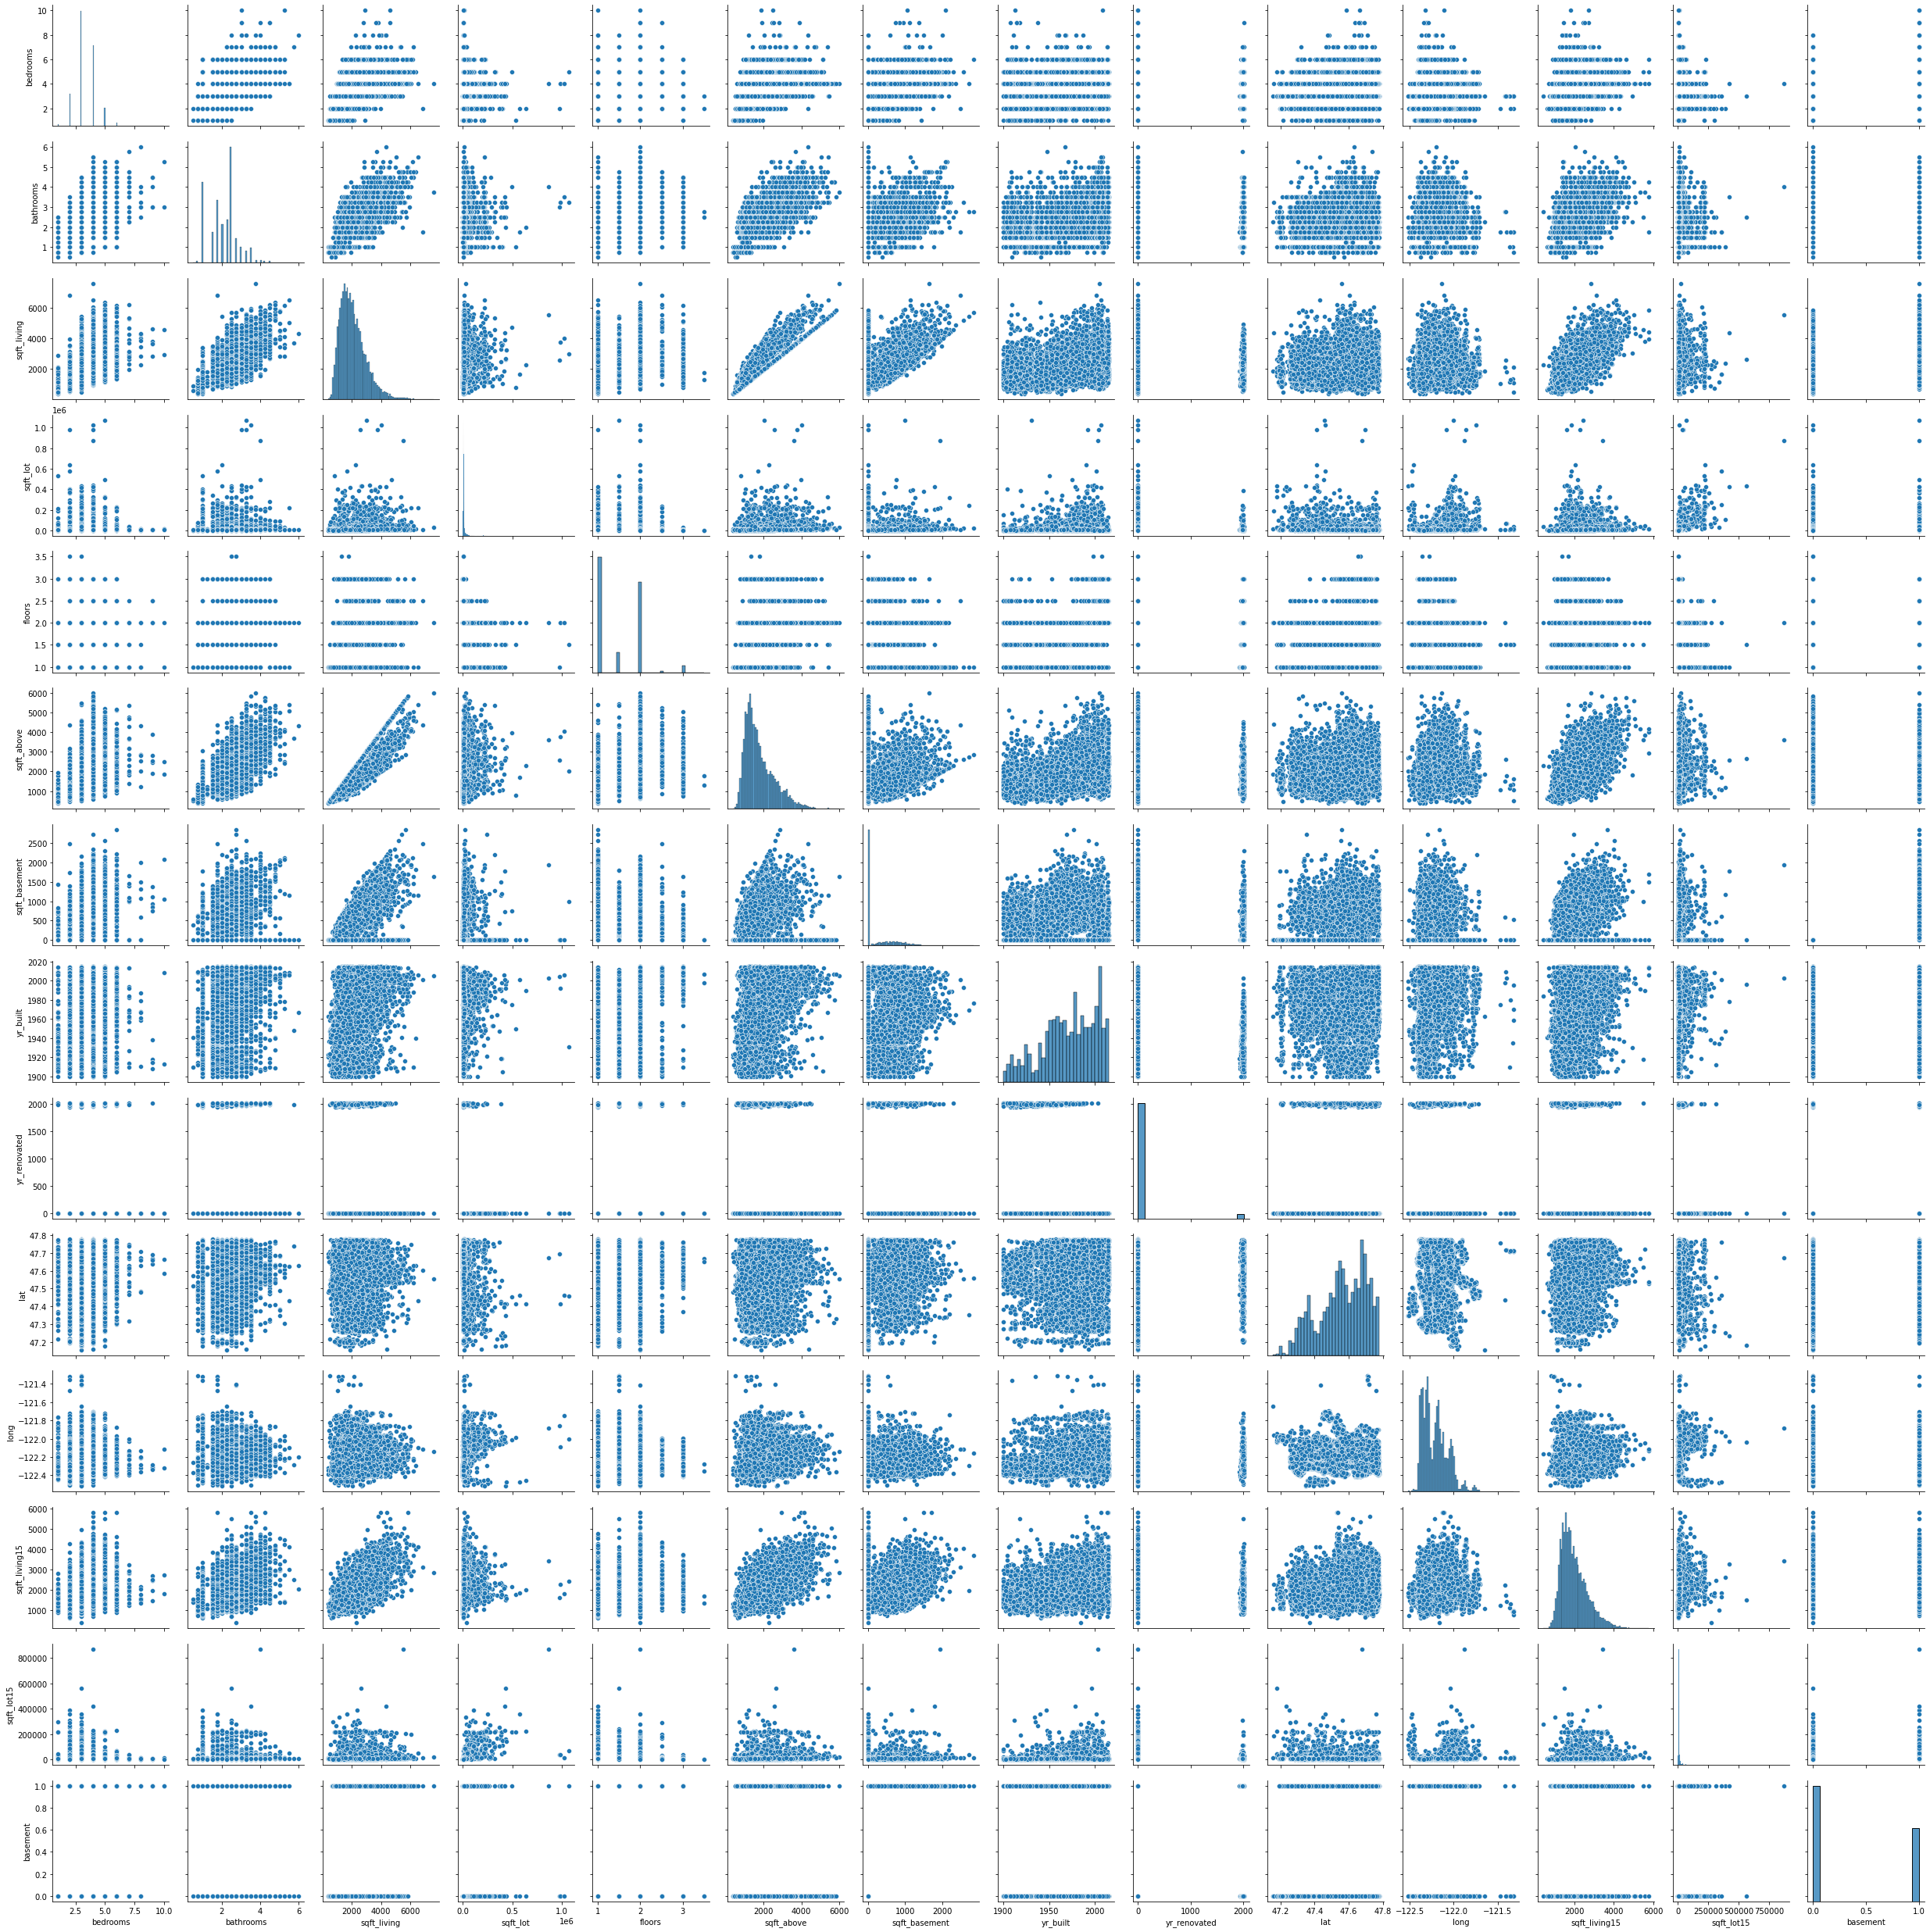

In [51]:
#Looking at the distributions of the X columns that were not encoded
X_train_not_encoded = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
                              'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
                              'sqft_lot15', 'basement']]
sns.pairplot(X_train_not_encoded)
plt.show()

In [52]:
# Standard scaling all continuous X_train columns

# Instantiating a new scaler
scaler = StandardScaler()

X_train[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
        = scaler.fit_transform \
            (X_train[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

In [53]:
# Standard scaling all continuous X_test columns

X_test[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
        = scaler.transform(X_test[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement',
                                   'sqft_living15', 'sqft_lot15']])

#### Normalizing Y

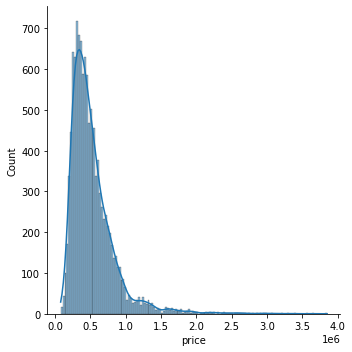

In [54]:
# Visualizing the y_train to see if I need to normalize the data
sns.displot(y_train, kde=True)

# Based on this displot, I will go ahead and normalize the y_train

In [55]:
# Using np.log to normalize y_train
y_train_log = np.log(y_train)

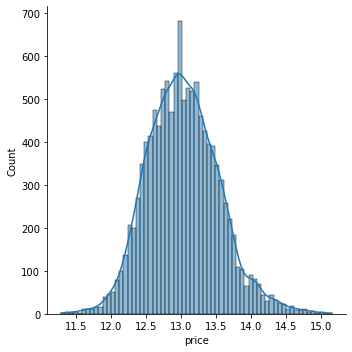

In [56]:
# Confirming that y_train_log is now normalized
sns.displot(y_train_log, kde=True)

#### Building Model 2

In [57]:
lr = LinearRegression()
X_train
lr.fit(X_train, y_train_log)

LinearRegression()

In [58]:
# Checking the R-squared of Model 2
r_squared = lr.score(X_train, y_train_log)
r_squared

0.8757548759499022

In [59]:
# Calculating thr Adjusted R-squared for Model 2 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.8750291964642999

In [60]:
# Checking for overfitting
y_test_log = np.log(y_test)

r_squared_test = lr.score(X_test, y_test_log)
r_squared_test

# Confirmed not overfitting

0.882754936050154

<AxesSubplot:ylabel='price'>

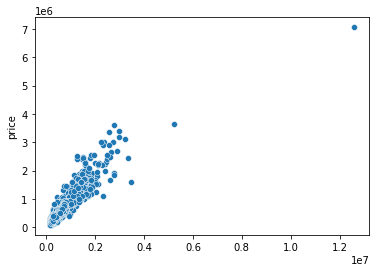

In [61]:
# Creating the y predictions
y_pred = lr.predict(X_test)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred = np.exp(y_pred)

# Plotting the y predictions against the y test
sns.scatterplot(y_pred, y_test)

In [62]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 72165.80703623733
Root Mean Square Error = 144600.25119640015


##### Comments about Model 2

An R-squared of 87.58% and adjusted R-squared of 87.5% are good, but the errors (MAE and RMSE) are still too high. These values, however, are all better than they were in the baseline model.

For my next model, I will take out homes with selling prices of over 2,000,000 and re-split the data.

After doing so, I will look at the correlations between different independent variables.

### Model 3

In [63]:
# Editing the dataset so that it only includes entries with house prices less than 2 million dollars 
kc_house_df_model_3 = kc_house_df.loc[kc_house_df['price'] < 2000000]

In [64]:
# Redoing train test split with kc_house_df_model_3 where 
# 70% of the data is in the train data and 30% is in the test data

# Target variable is price
y = kc_house_df_model_3['price']

# Predictor variables are every variable except price
X = kc_house_df_model_3.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [65]:
# Checking the new lengths of X_train and X_test
print(len(X_train))
print(len(X_test))

11851
5079


#### Note: Since I did train test split again, I now have to repeat the One Hot Encoding, Ordinal Encoding, Standard Scaling, and np.log processes that I did previously

#### One Hot Encoding

In [66]:
onehot_enc = OneHotEncoder(handle_unknown = 'error', drop = 'first', sparse = False)

# Nominal columns from the dataset
nom_col = ['zipcode', 'waterfront', 'month_sold', 'year_sold']

# One Hot Encoding
nom_cats_train = onehot_enc.fit_transform(X_train[nom_col])
nom_cats_test = onehot_enc.transform(X_test[nom_col])

# Assigning the column names of the dummy variables to columns
columns = onehot_enc.get_feature_names_out()

# Turning the One Hot Encoded data into dataframes (one for train, one for test)
nom_cats_train = pd.DataFrame(nom_cats_train, columns = columns)
nom_cats_test = pd.DataFrame(nom_cats_test, columns = columns)

# Concating X_train and nom_cats_train to make one large dataframe and reassigning it to X_train
X_train = pd.concat([X_train.reset_index(), nom_cats_train], axis = 1)

# Concating X_test and nom_cats_test to make one large dataframe and reassigning it to X_test
X_test = pd.concat([X_test.reset_index(), nom_cats_test], axis = 1)

In [67]:
# Dropping the original 'zipcode' and 'waterfront' columns from the train data
X_train.drop(columns = ['zipcode', 'waterfront', 'month_sold', 'year_sold'], inplace = True)

# Dropping the original 'zipcode' and 'waterfront' columns from the test data
X_test.drop(columns = ['zipcode', 'waterfront', 'month_sold', 'year_sold'], inplace = True)

# I can also drop 'index' and 'id' because they are not relevent
X_train.drop(columns = ['index', 'id'], inplace = True)
X_test.drop(columns = ['index', 'id'], inplace = True)

#### Ordinal Encoding

In [68]:
# Ordinal columns in the dataset
ord_cat_selector = ['view', 'condition', 'grade']

# Creating the train and test subsets that only include the relevant columns
ord_cat_subset_train = X_train[ord_cat_selector]
ord_cat_subset_test = X_test[ord_cat_selector]

# Correctly ordering the values of the ordinal columns
view_ord = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_ord = ['Poor', 'Fair', 'Average', 'Good','Very Good']
grade_ord = ['4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent']

# Defining ord_enc using OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [view_ord, condition_ord, grade_ord])

# Ordinal Encoding
ord_enc.fit_transform(ord_cat_subset_train)
ord_enc.transform(ord_cat_subset_test)

# Turning the Ordinal Encoded data into dataframes (one for train, one for test)
ord_cat_subset_train = pd.DataFrame(ord_enc.transform(ord_cat_subset_train),
                        columns = ord_cat_subset_train.columns)

ord_cat_subset_test = pd.DataFrame(ord_enc.transform(ord_cat_subset_test),
                        columns = ord_cat_subset_test.columns)


# Concating X_train and ord_cat_subset_train to make one large dataframe and reassigning it to X_train
X_train = pd.concat([X_train, ord_cat_subset_train], axis = 1)

# Concating X_test and ord_cat_subset_test to make one large dataframe and reassigning it to X_test
X_test = pd.concat([X_test, ord_cat_subset_test], axis = 1)

In [69]:
#Including only the columns that have numerical values 
#(this is essentially taking out the original 'view', 'condition', and 'grade' columns without dropping them)

X_train = X_train.select_dtypes(include='number')

X_test = X_test.select_dtypes(include='number')

#### Standard Scaling X

In [70]:
# Standard scaling all continuous X_train columns

# Instantiating a new scaler
scaler = StandardScaler()

X_train[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
        = scaler.fit_transform \
            (X_train[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

In [71]:
# Standard scaling all continuous X_test columns

X_test[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
        = scaler.transform(X_test[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement',
                                   'sqft_living15', 'sqft_lot15']])

#### Normalizing Y

In [72]:
# Using np.log to normalize y_train 

y_train_log = np.log(y_train)

#### Building Model 3

In [73]:
lr = LinearRegression()

lr.fit(X_train, y_train_log)

LinearRegression()

In [74]:
# Checking the R-squared of Model 3
r_squared = lr.score(X_train, y_train_log)
r_squared

0.8733966966301459

In [75]:
# Calculating thr Adjusted R-squared for Model 3 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.8726519713162055

In [76]:
# Checking for overfitting
y_test_log = np.log(y_test)

r_squared = lr.score(X_test, y_test_log)
r_squared

# Confirmed not overfit

0.8622698889458207

<AxesSubplot:ylabel='price'>

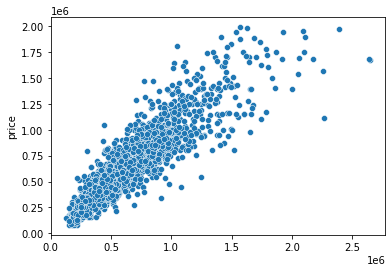

In [77]:
# Creating the y predictions
y_pred = lr.predict(X_test)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred = np.exp(y_pred)

# Plotting the y predictions against the y test
sns.scatterplot(y_pred, y_test)

In [78]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 68654.83181833781
Root Mean Square Error = 108302.4379146974


##### Comments about Model 3

An adjusted R-squared of 87.27% is good, but it did slightly decrease compared to Model 2, which is not ideal.

While it is good that the errors (MAE and RMSE) decreased compared to Model 2, they are still too high.

In [79]:
# Making a correlation table to assess multicolinearity
correlation_table = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
correlation_table['pairs'] = list(zip(correlation_table.level_0, correlation_table.level_1))

# Set index to pairs
correlation_table.set_index(['pairs'], inplace = True)

# Drop level columns
correlation_table.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename correlation column as cc rather than 0
correlation_table.columns = ['cc']

# Limiting the correlation table to show the highest correlations - not including those that are equal to 1
correlation_table = correlation_table.loc[(correlation_table['cc']>.7) & (correlation_table['cc'] <1)]

# Dropping duplicates
correlation_table.drop_duplicates(inplace = True)

correlation_table

cc
pairs                               
(sqft_above, sqft_living)    0.86254
(sqft_basement, basement)    0.83065
(sqft_living15, sqft_living) 0.74922
(sqft_living, grade)         0.73941
(grade, sqft_above)          0.73352
(bathrooms, sqft_living)     0.73286
(sqft_lot15, sqft_lot)       0.72346
(sqft_above, sqft_living15)  0.71524

The correlation table shows me that I should drop one variable from each of the pairs to avoid multicollinearity in the next model **(Model 4)**:
- **'sqft_living' vs. 'sqft_above'**: I will drop 'sqft_above' because 'sqft_living' represents the square footage of the whole house whereas 'sqft_above' represents the square footage of the house apart from the basement. In other wordss, keeping 'sqft_living' simplifies the model because it can provide more information than 'sqft_above' from just one column.
- **'sqft_basement' vs. 'basement'**: I will drop 'basement' because like the previous pair, 'sqft_basement" can provide more information than 'basement' from just one column. Not only does 'sqft_basement" include the size of the basement, but it also implies whether or not a house has a basement.
- **'sqft_living' vs. 'sqft_living15'**: As mentioned, 'sqft_living' represents the total square footage of the house. 'sqft_living_15' represents the avaerage square footage of the houses of nearest 15 neighbors. When thinking about which of these two is more important to the goal of my model, 'sqft_living' is the clear answer. Therefore, I will drop 'sqft_living15'
- **'sqft_living' vs. 'grade'**: Since I have already said that I will be keeping 'sqft_living' in my model, the only option is to drop 'grade'
- **'grade' vs. 'sqft_above'**: I will be dropping both of these columns based on the other pairings above.
- **'bathrooms' vs. 'sqft_living'**: Since I have already said I will be keeping 'sqft_living' in my model, the only choice is to drop 'bathrooms'
- **'sqft_lot15' vs. sqft_lot'**: Similarly to the case with 'sqft_living' vs. 'sqft_living15', it seems more appropriate to drop 'sqft_lot15'
- **'sqft_above' vs. 'sqft_living15'**: I will be dropping both of these columns based on the other pairings above.

After creating a model with such variables, I make another model **(Model 5)** in which I instead drop 'sqft_living' and keep 'sqft_above', 'grade', and 'bathrooms'. In this alternate model, I will still be dropping 'basement', 'sqft_living15', and 'sqft_lot15'.

### Model 4

In [80]:
# In addition to dropping the columns mentioned above, an additional edit that I would 
# like to do at this point in my modeling is to make a boolean column in both X_train and X_text
# called 'renovation'where a value of 1 means that the house has been renovated and 
# a value of 0 means that the house has not been renovated

X_train.loc[X_train['yr_renovated'] == 0, 'renovations'] = 0
X_train.loc[X_train['yr_renovated'] != 0, 'renovations'] = 1

X_test.loc[X_test['yr_renovated'] == 0, 'renovations'] = 0
X_test.loc[X_test['yr_renovated'] != 0, 'renovations'] = 1

In [81]:
# Dropping the columns mentioned above
# I will also drop 'yr_renovated' because I made the new 'renovations' column

X_train_4 = X_train.drop(columns = ['sqft_above', 'grade', 'basement', 'sqft_living15', 
                                    'bathrooms', 'sqft_lot15', 'yr_renovated' ])
X_test_4 = X_test.drop(columns = ['sqft_above', 'grade', 'basement', 'sqft_living15', 
                                  'bathrooms', 'sqft_lot15', 'yr_renovated' ])

In [82]:
lr = LinearRegression()

lr.fit(X_train_4, y_train_log)

LinearRegression()

In [83]:
# Checking the R-squared of Model 3
r_squared = lr.score(X_train_4, y_train_log)
r_squared

0.8517094250094421

In [84]:
# Calculating thr Adjusted R-squared for Model 3 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_4.shape[1]-1))
adj_r2

0.8508902860527944

In [85]:
# Checking for overfitting
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_4, y_test_log)
r_squared

# Confirmed not overfit

0.8413367610997828

<AxesSubplot:ylabel='price'>

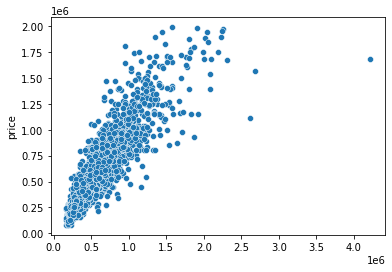

In [86]:
# Creating the y predictions
y_pred = lr.predict(X_test_4)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred = np.exp(y_pred)

# Plotting the y predictions against the y test
sns.scatterplot(y_pred, y_test)

In [87]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 74476.04557290486
Root Mean Square Error = 121579.82405532278


In [88]:
#model_4_coefs = lr.coef_
#model_4_coefs_w_labels = sorted(list(zip(model_4_coefs, X_train_4.columns)), reverse = True)
#model_4_coefs_w_labels

##### Comments about Model 4

The adjusted R-squared for this model is 85.1% which is less than the previous model, and the errors (MAE and RMSE) increased compared to the previous model.

This tells me that the changes I made for Model 4 were not necessarily effective in minimizing error and maximized the adjusted R-squared value.

### Model 5

In [89]:
# For this model, I will do the alternate model that I had mentioned previously
# I will drop 'sqft_living' instead of 'sqft_above' and 'bathrooms'
# I will still drop 'basement', 'sqft_living15', and 'sqft_lot15' like I did in model 4
# I will also drop 'yr_renovated' because there is now a new column 'renovations'

# Dropping the mentioned columns
X_train_5 = X_train.drop(columns = ['sqft_living' ,'sqft_living15', 'sqft_lot15', 'basement', 'yr_renovated'])
X_test_5 = X_test.drop(columns = ['sqft_living', 'sqft_living15', 'sqft_lot15', 'basement', 'yr_renovated'])

In [90]:
lr = LinearRegression()

lr.fit(X_train_5, y_train_log)

LinearRegression()

In [91]:
# Checking the R-squared of Model 3
r_squared = lr.score(X_train_5, y_train_log)
r_squared

0.869023341176946

In [92]:
# Calculating thr Adjusted R-squared for Model 3 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_5.shape[1]-1))
adj_r2

0.8682841952467933

In [93]:
# Checking for overfitting
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_5, y_test_log)
r_squared

# Confirmed not overfit

0.8580337494506161

<AxesSubplot:ylabel='price'>

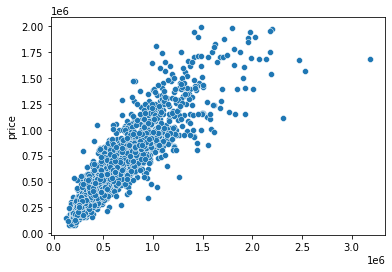

In [94]:
# Creating the y predictions
y_pred = lr.predict(X_test_5)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred = np.exp(y_pred)

# Plotting the y predictions against the y test
sns.scatterplot(y_pred, y_test)

In [95]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 69707.09727003184
Root Mean Square Error = 111110.37677312213


##### Comments about Model 5

Interestingly, the adjusted R-squared for this model is 86.83% which is higher than the previous model.

Also, the errors (MAE and RMSE) descreased signficantly compared to the previous model.

This shows me that the alternate changes were the more accurate choices compared to Model 4.

Recap of models up to this point:
- Model 2 had the highest adjusted R-squared (but with high errors), and Model 3 had the best adjusted R-squared and errors pairing. However, these models were not simplified and did not account for multicollinearity (which can explain the higher adjusted R-squared). In other words, while I want low errors and a high adjusted R-squared, I also want to ensure that such values come from the simplest model possible and genuine accuracy.
- Therefore, so far, Model 5 has been the best model; it accounts for multicollinearity and has been simplified to a degree resulting in a high adjusted R-squared and decreased errors. Nevertheless, there is still more work to be done.

In [96]:
# Now that I know Model 5 is better than Model 4, I am going to look at the coefficients 
# to see which variables have the smallest impact on 'price' and should therefore be dropped from the next model

model_5_coefs = lr.coef_
model_5_coefs_w_labels = sorted(list(zip(model_5_coefs, X_train_5.columns)), reverse = True)
model_5_coefs_w_labels

#'yr_built' has the lowest impact on 'price' by far

[(1.0866673505369757, 'zipcode_98039'),
 (0.9715357044189962, 'zipcode_98004'),
 (0.8393332881286382, 'zipcode_98112'),
 (0.7764946760065506, 'zipcode_98040'),
 (0.7659180272833583, 'zipcode_98119'),
 (0.7444993374005882, 'zipcode_98109'),
 (0.7378058760151192, 'zipcode_98102'),
 (0.7240601466549448, 'zipcode_98105'),
 (0.6402978546145567, 'zipcode_98005'),
 (0.6196903934626503, 'zipcode_98122'),
 (0.6013745295429264, 'zipcode_98033'),
 (0.6010029321204999, 'zipcode_98199'),
 (0.5942228326690235, 'zipcode_98115'),
 (0.5809753517949595, 'zipcode_98029'),
 (0.573702797650777, 'zipcode_98107'),
 (0.5688927482492306, 'zipcode_98006'),
 (0.5656306779687651, 'zipcode_98008'),
 (0.5611014636002568, 'zipcode_98116'),
 (0.5583317336360406, 'zipcode_98103'),
 (0.5470937021586273, 'lat'),
 (0.5380395047749591, 'zipcode_98007'),
 (0.5291642142859614, 'zipcode_98117'),
 (0.5224433189859893, 'zipcode_98052'),
 (0.5210875007328657, 'zipcode_98075'),
 (0.507028132556284, 'zipcode_98027'),
 (0.50576228

### Model 6 - NOT DONE

In [97]:
X_train_6 = X_train.drop(columns = ['sqft_living' ,'sqft_living15', 'sqft_lot15', 
                                    'basement', 'yr_renovated', 'yr_built', 'bedrooms', 'zipcode_98003', 
                                    'zipcode_98198', 'zipcode_98002'])
X_test_6 = X_test.drop(columns = ['sqft_living' ,'sqft_living15', 'sqft_lot15', 
                                    'basement', 'yr_renovated', 'yr_built', 'bedrooms', 'zipcode_98003',
                                     'zipcode_98198', 'zipcode_98002'])

In [98]:
lr = LinearRegression()

lr.fit(X_train_6, y_train_log)

LinearRegression()

In [99]:
# Checking the R-squared of Model 3
r_squared = lr.score(X_train_6, y_train_log)
r_squared

0.8687495748843572

In [100]:
# Calculating thr Adjusted R-squared for Model 3 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_6.shape[1]-1))
adj_r2

0.8680480760863046

In [101]:
# Checking for overfitting
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_6, y_test_log)
r_squared

# Confirmed not overfit

0.8575914737042281

<AxesSubplot:ylabel='price'>

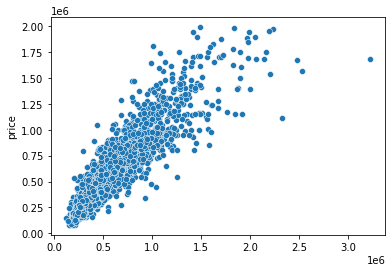

In [102]:
# Creating the y predictions
y_pred = lr.predict(X_test_6)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred = np.exp(y_pred)

# Plotting the y predictions against the y test
sns.scatterplot(y_pred, y_test)

In [103]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 69775.60675314072
Root Mean Square Error = 111248.82543079034


In [104]:
model_6_coefs = lr.coef_
model_6_coefs_w_labels = sorted(list(zip(model_6_coefs, X_train_6.columns)), reverse = True)
model_6_coefs_w_labels

[(1.099093152844635, 'zipcode_98039'),
 (0.9794159983910182, 'zipcode_98004'),
 (0.8620127575246057, 'zipcode_98112'),
 (0.7892096746433425, 'zipcode_98119'),
 (0.7831963315223263, 'zipcode_98040'),
 (0.7683593968221641, 'zipcode_98109'),
 (0.7620812310507188, 'zipcode_98102'),
 (0.7445035053759591, 'zipcode_98105'),
 (0.6482698569380366, 'zipcode_98005'),
 (0.6387598482833786, 'zipcode_98122'),
 (0.6122183985530765, 'zipcode_98199'),
 (0.6088209219942888, 'zipcode_98115'),
 (0.6053353432608204, 'zipcode_98033'),
 (0.5892577431412043, 'zipcode_98107'),
 (0.5877986008208327, 'zipcode_98029'),
 (0.5751748414302705, 'zipcode_98116'),
 (0.5750957883552439, 'zipcode_98103'),
 (0.5740263410624933, 'zipcode_98006'),
 (0.5714878652416574, 'zipcode_98008'),
 (0.5489967636634099, 'lat'),
 (0.5448892709444151, 'zipcode_98007'),
 (0.543532303084578, 'zipcode_98117'),
 (0.5264808298921282, 'zipcode_98075'),
 (0.5264796758891211, 'zipcode_98052'),
 (0.5122897947440346, 'zipcode_98027'),
 (0.50648610

## Regression Results

## Conclusions